In [1]:
import sys
import os
import numpy as np
import pickle
from itertools import product
import matplotlib.pyplot as plt

from qiskit.circuit import QuantumCircuit
from qiskit.quantum_info import DensityMatrix, Statevector, Operator
from qiskit_experiments.library.tomography.basis import PauliPreparationBasis


os.environ["KMP_DUPLICATE_LIB_OK"] = "True"
module_path = os.path.abspath(
    os.path.join(
        "/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control"
    )
)
if module_path not in sys.path:
    sys.path.append(module_path)

from q_env_config_edu_example import (
    q_env_config as gate_q_env_config,
)
from quantumenvironment import QuantumEnvironment
from gymnasium.spaces import Box
from gymnasium.wrappers import RescaleAction, ClipAction
from helper_functions import get_baseline_fid_from_phi_gamma, load_from_yaml_file


import logging

logging.basicConfig(
    level=logging.WARNING,
    format="%(asctime)s INFO %(message)s",  # hardcoded INFO level
    datefmt="%Y-%m-%d %H:%M:%S",
    stream=sys.stdout,
)

/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/venv_qiskit10/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Circuit context
Circuit context


/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/template_configurations/qiskit/gate_level/q_env_config_edu_example.py:110: UserWarning: No backend was provided, State vector simulation will be used
  warnings.warn("No backend was provided, State vector simulation will be used")


In [2]:
gate_q_env_config.action_space

Box(-3.14, 3.14, (1,), float32)

In [3]:
q_env = QuantumEnvironment(gate_q_env_config)
q_env = ClipAction(q_env)
q_env = RescaleAction(q_env, -1.0, 1.0)

Checking reward to adjust C Factor...
fidelity access False
Starting simulation benchmark...
State fidelity: 0.44432090055556295
Finished simulation benchmark
Sending Estimator job...
SparsePauliOp(['I', 'Z'],
              coeffs=[ 1.+0.j, -1.+0.j])
Finished Estimator job


/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/helper_functions.py:1708: UserWarning: No Backend was provided, using default values for dt, coupling_map, basis_gates and instruction_durations
  warnings.warn(


In [4]:
q_env.unwrapped.target.dm

DensityMatrix([[0.+0.j, 0.+0.j],
               [0.+0.j, 1.+0.j]],
              dims=(2,))


In [5]:
path_agent_config = '/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/template_configurations/agent_config.yaml'
path_hpo_config = '/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/template_configurations/qiskit/gate_level/noise_hpo_config_edu_example.yaml'
save_results_path = "hpo_results/educational_example"

In [6]:
experimental_penalty_weights = {
    'penalty_n_shots': 0.01,
    'penalty_per_missed_fidelity': 1e4,
    'fidelity_reward': 2*1e4,
}

In [7]:
from hyperparameter_optimization_resource_constraint import HyperparameterOptimizer

In [8]:
optimizer = HyperparameterOptimizer(
    q_env=q_env,
    path_agent_config=path_agent_config,
    path_hpo_config=path_hpo_config,
    save_results_path=save_results_path,
    saving_mode="all",
    experimental_penalty_weights=experimental_penalty_weights,
    log_progress=False,
)

In [9]:
num_hpo_trials = 100
target_fidelities = [0.99, 0.999, 0.9999] # , 0.99999]
lookback_window = 8
max_hardware_runtime = 30

In [11]:
all_trials = optimizer.optimize_hyperparameters(
    num_hpo_trials=num_hpo_trials,
    phi_gamma_tuple=None,                                        
    target_fidelities=target_fidelities,
    lookback_window=lookback_window,
    max_runtime=max_hardware_runtime,
)

fidelity access False
Starting simulation benchmark...
State fidelity: 0.9999741706299361
Finished simulation benchmark
Sending Estimator job...
SparsePauliOp(['I', 'Z'],
              coeffs=[ 1.+0.j, -1.+0.j])
Finished Estimator job
Total Harware time taken: 26.18401279999999 s.
Total Updates applied: 251
Total Shots applied: 5,950,912
fidelity access False
Starting simulation benchmark...
State fidelity: 0.9999734688256393
Finished simulation benchmark
Sending Estimator job...
SparsePauliOp(['I', 'Z'],
              coeffs=[ 1.+0.j, -1.+0.j])
Finished Estimator job
Total Harware time taken: 26.28700799999999 s.
Total Updates applied: 252
Total Shots applied: 5,974,320
fidelity access False
Starting simulation benchmark...
State fidelity: 0.9999738509008637
Finished simulation benchmark
Sending Estimator job...
SparsePauliOp(['I', 'Z'],
              coeffs=[ 1.+0.j, -1.+0.j])
Finished Estimator job
Total Harware time taken: 26.38767999999999 s.
Total Updates applied: 253
Total Shots

[I 2024-05-20 08:15:23,419] Trial 99 finished with value: -42241.6 and parameters: {'MINIBATCH_SIZE': 176, 'SAMPLE_PAULIS': 257}. Best is trial 78 with value: -59894.81.


2024-05-20 08:15:31 INFO All trials have been saved to hpo_results/educational_example/state_preparation_custom-cost-value--59894.81_timestamp_20-05-2024_08-15-23.pickle.


### Since we determine the cut-off at a specific hardware runtime, the total number of shots spent is the same for all configurations

In [ ]:
import pickle
with open('/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/template_configurations/qiskit/gate_level/hpo_results/educational_example/state_preparation_target_state-1_custom-cost-value--58987.2_timestamp_07-05-2024_05-14-23.pickle', 'rb') as f:
    all_trials = pickle.load(f)

In [12]:
len(all_trials)

98

Minibatch Sizes (67, 96, 73)
Batchsize Multipliers (1, 1, 1)
Batchsizes (67, 96, 73)
Sample Paulis (2, 1, 3)


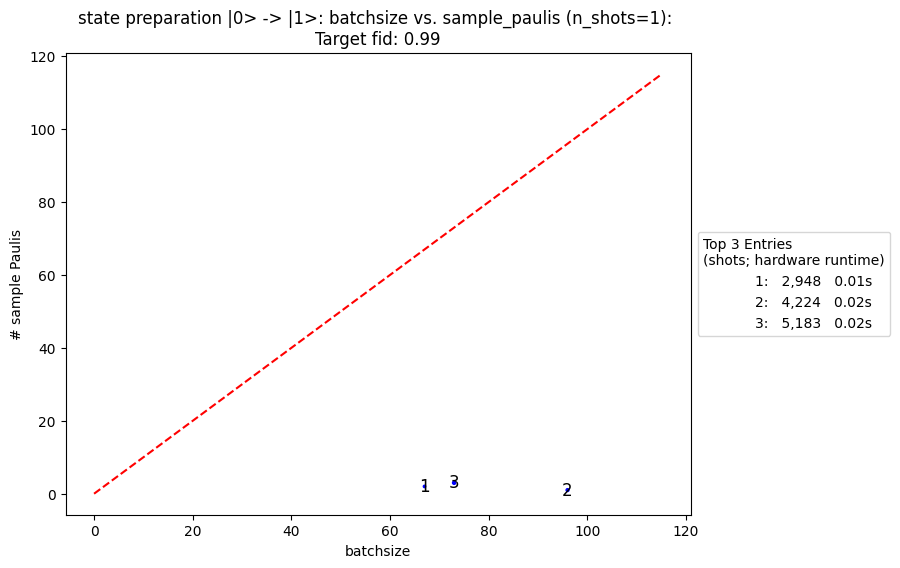

Minibatch Sizes (67, 96, 130)
Batchsize Multipliers (1, 1, 1)
Batchsizes (67, 96, 130)
Sample Paulis (2, 1, 1)


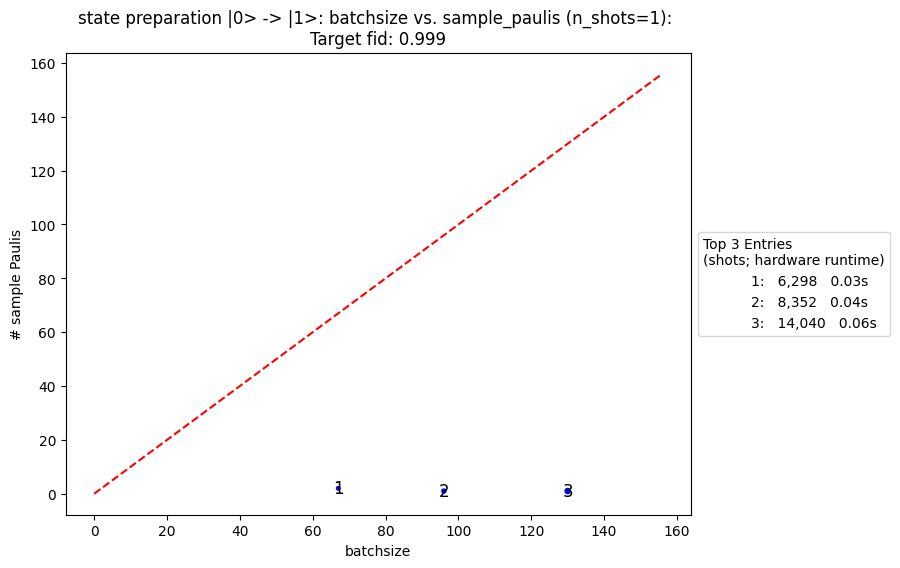

Minibatch Sizes (67, 73, 107)
Batchsize Multipliers (1, 1, 1)
Batchsizes (67, 73, 107)
Sample Paulis (2, 3, 1)


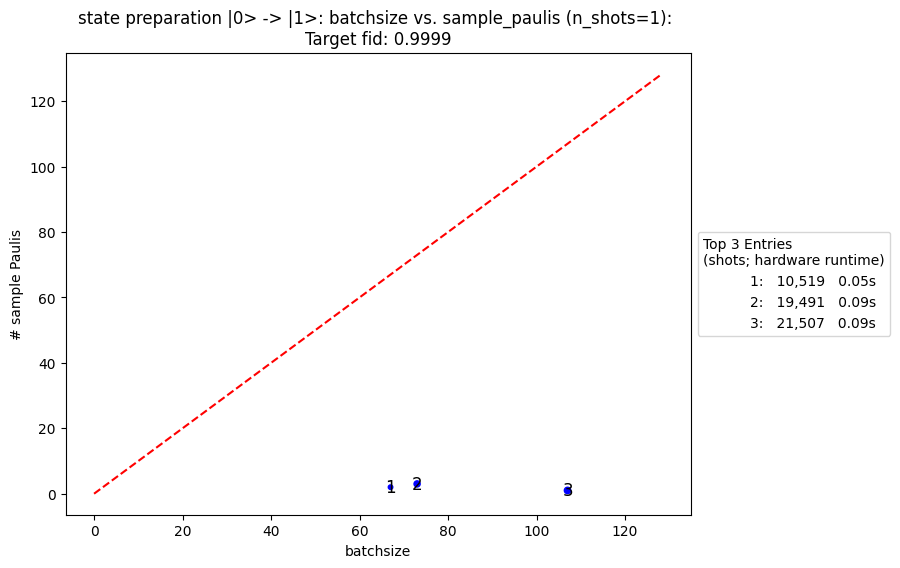

In [18]:
def plot_for_fidelity(fid_target, top_N: int = 10):
    # Filter data based on fidelity target
    filtered_all_trials = [entry for entry in all_trials if entry['training_results']['fidelity_info'][fid_target]['achieved'] == True]
    
    # Extract necessary data
    minibatch_size = [entry['hyper_params']['MINIBATCH_SIZE'] for entry in filtered_all_trials]
    if 'BATCHSIZE_MULTIPLIER' in filtered_all_trials[0]['hyper_params']:
        batchsize_multiplier = [entry['hyper_params']['BATCHSIZE_MULTIPLIER'] for entry in filtered_all_trials]
    else:
        batchsize_multiplier = len(minibatch_size) * [1] # Only if batchsize_multiplier is not in the hyperparameters

    # batchsize_multiplier = [entry['hyper_params']['BATCHSIZE_MULTIPLIER'] for entry in filtered_all_trials]
    batchsize = [minibatch * multiplier for minibatch, multiplier in zip(minibatch_size, batchsize_multiplier)]

    sample_Paulis = [entry['hyper_params']['SAMPLE_PAULIS'] for entry in filtered_all_trials]
    shots_used = [entry['training_results']['fidelity_info'][fid_target]['shots_used'] for entry in filtered_all_trials]
    sizes = [total_shots / 1e3 for total_shots in shots_used]
    hardware_runtimes = [entry['training_results']['fidelity_info'][fid_target]['hardware_runtime'] for entry in filtered_all_trials]
    custom_cost_values = [entry['custom_cost_value'] for entry in filtered_all_trials]
    
    # Sort the list based on custom_cost_value
    sorted_data = sorted(zip(batchsize, sample_Paulis, shots_used, sizes, hardware_runtimes, custom_cost_values, minibatch_size, batchsize_multiplier), key=lambda x: x[3])

    # Select top 10 entries
    top_N_data = sorted_data[:top_N]
    if len(top_N_data) < top_N:
        print(f"Target Fidelity {fid_target}: Only {len(top_N_data)} entries available for top 10 plot.")
        top_N_data = sorted_data
        if len(top_N_data) == 0:
            print(f"No entries available for top 10 plot. Skipping plot for target fidelity {fid_target}.")
            return

    # Create scatter plot
    plt.figure(figsize=(10, 6))
    top_N_bs, top_N_sP, top_N_shots_used, top_N_sizes, top_N_hardware_runtimes, _, top_N_minibatch_size, top_N_batchsize_multiplier = zip(*top_N_data)

    print('Minibatch Sizes', top_N_minibatch_size)
    print('Batchsize Multipliers', top_N_batchsize_multiplier)
    print('Batchsizes', top_N_bs)
    print('Sample Paulis', top_N_sP)

    top_N_sizes = np.array(top_N_sizes)
    plt.scatter(top_N_bs, top_N_sP, s=top_N_sizes, label=top_N_shots_used, c='blue')

    # Add text annotations for ranking
    for i, (x, y, shots_used, _, _, _, minibatch_size, batchsize_multiplier) in enumerate(top_N_data):
        plt.text(x, y, str(i+1), fontsize=12, ha='center', va='center', color='black')

    # Add a scattered red line with y=x to indicate the threshold line between batchsize and sample_paulis
    plt.plot(np.linspace(0, max(top_N_bs) * 1.2), np.linspace(0, max(top_N_bs) * 1.2), color='red', linestyle='--')

    # Add labels and title
    plt.xlabel('batchsize')
    plt.ylabel('# sample Paulis')
    plt.title(f'state preparation |0> -> |1>: batchsize vs. sample_paulis (n_shots=1): \nTarget fid: {fid_target}')
    
    # Add custom legend as a table
    labels = [f'{i+1}:   {int(shots):,}   {hw_runtime:.2f}s' for i, (shots, hw_runtime) in enumerate(zip(top_N_shots_used, top_N_hardware_runtimes))]
    custom_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=0) for size in top_N_sizes]
    plt.legend(custom_handles, labels, loc="center left", bbox_to_anchor=(1, 0.5), title=f"Top {top_N} Entries\n(shots; hardware runtime)")

    # Adjust plot to make space for the legend
    plt.subplots_adjust(right=0.75)

    # Set plot limits
    plt.show()

# Loop over each fidelity target and create a plot
for fid_target in target_fidelities:
    plot_for_fidelity(fid_target, top_N=3)